# 选择文件

In [2]:
# 选择文件
import tkinter as tk
from tkinter import filedialog
import pandas as pd

def open_file():
    filepath = filedialog.askopenfilename(
        initialdir="/CsvFiles", 
        title="Select a CSV file", 
        filetypes=(("CSV files", "*.csv"), ("all files", "*.*"))
    )
    if filepath:
        try:
            df = pd.read_csv(filepath)
            print(df.head())  # or any other operation you want to perform on the DataFrame
        except Exception as e:
            print(f"Error reading the file: {e}")
        return filepath
            
            
file_path = open_file()

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [3]:
# 选择数据列
import pandas as pd

# 创建一个函数来从 CSV 文件中读取列并让用户选择
def select_columns_from_csv(file_path):
    # 从 CSV 文件中读取数据
    df = pd.read_csv(file_path)
    
    # 罗列出所有列
    columns = df.columns
    print("所有可用列：")
    for index, col in enumerate(columns):
        print(f"{index}: {col}")
    
    # 让用户选择列
    selected_indices = input("请输入你选择的列的索引（用逗号分隔，例如 0,2）：")
    selected_indices = [int(index.strip()) for index in selected_indices.split(',')]
    
    # 返回用户选择的列
    selected_columns = [columns[index] for index in selected_indices]
    return df[selected_columns]

# 使用该函数并输出结果
selected_df = select_columns_from_csv(file_path)
print("你选择的列：")
print(selected_df)

所有可用列：
0: anxiety_level
1: self_esteem
2: mental_health_history
3: depression
4: headache
5: blood_pressure
6: sleep_quality
7: breathing_problem
8: noise_level
9: living_conditions
10: safety
11: basic_needs
12: academic_performance
13: study_load
14: teacher_student_relationship
15: future_career_concerns
16: social_support
17: peer_pressure
18: extracurricular_activities
19: bullying
20: stress_level
你选择的列：
      anxiety_level
0                14
1                15
2                12
3                16
4                16
...             ...
1095             11
1096              9
1097              4
1098             21
1099             18

[1100 rows x 1 columns]


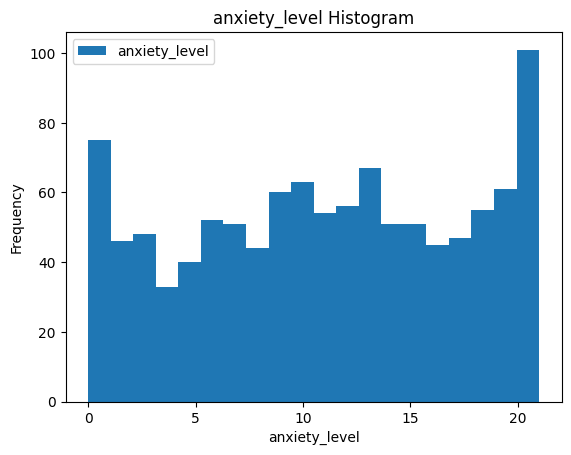

In [61]:
# 创建基本图像
import matplotlib.pyplot as plt
# 创建绘图函数
def create_plot(selected_df):
    # 检查有多少列被选择
    num_cols = len(selected_df.columns)
    
    # 根据列数选择不同的绘图图表
    if num_cols == 1:
        # 如果只有一列，绘制直方图
        selected_df.plot(kind='hist', bins=20)
        plt.xlabel(selected_df.columns[0])
        plt.title(f"{selected_df.columns[0]} Histogram")
    elif num_cols == 2:
        # 如果有两列，绘制散点图
        selected_df.plot(kind='scatter', x=selected_df.columns[0], y=selected_df.columns[1])
        plt.xlabel(selected_df.columns[0])
        plt.ylabel(selected_df.columns[1])
        plt.title(f"{selected_df.columns[0]} vs {selected_df.columns[1]} Scatter Plot")
    else:
        print("选择的列数不适合生成图表")
    
    # 显示图表
    plt.show()
create_plot(selected_df)

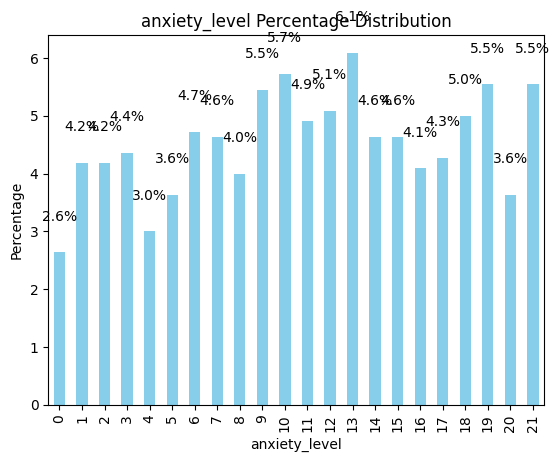

In [62]:
# 创建百分比图像
def create_percentage_bar_plot(selected_df):
    # 检查有多少列被选择
    if len(selected_df.columns) != 1:
        print("为了生成百分比柱状图，你需要选择一列")
        return
    
    # 计算每个类别的绝对值统计并排序
    value_counts = selected_df[selected_df.columns[0]].value_counts().sort_index()
    
    # 计算百分比
    value_counts_percentage = (value_counts / value_counts.sum()) * 100
    
    # 创建条形图
    ax = value_counts_percentage.plot(kind='bar', color='skyblue')
    plt.ylabel('Percentage')
    plt.xlabel(selected_df.columns[0])
    plt.title(f"{selected_df.columns[0]} Percentage Distribution")
    
    # 给每个条形顶部添加百分比标注
    for idx, val in enumerate(value_counts_percentage):
        ax.text(idx, val + 0.5, f'{val:.1f}%', ha='center', va='bottom')
    
    # 显示图表
    plt.show()
create_percentage_bar_plot(selected_df)